In [3]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from glob import glob
import random
import cv2
from keras.models import Model
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the cultural context layer
def cultural_context_layer(input_shape):
    def cultural_context(x):
        # Add your cultural context adjustment code here
        # For example, you can use an embedding layer to represent the cultural background
        # and multiply it with the output of the previous layer
        return x
    return Input(shape=input_shape), cultural_context

def create_model(input_shape, num_classes):
    # Define the input layer
    inputs = Input(shape=input_shape)
    
    # Add your CNN architecture layers here
    # Example:
    x = Conv2D(32, (3, 3), activation='relu')(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)  # Output layer for classification
    
    # Create the model
    model = Model(inputs=inputs, outputs=outputs)
    
    return model


# Define the CNN architecture
#def create_model(input_shape, num_classes):
    # Add your CNN architecture code here
    # For example, you can use a VGG16 or ResNet50 architecture
    #return Model(inputs=inputs, outputs=outputs)

# Load the dataset
train_images_paths = glob("C:/Users/Anjali/Desktop/Emotion_Recognition/archive (1)/train/**/**")

# Display some random images
for i in range(9):
    image_path = random.choice(train_images_paths)
    image = cv2.imread(image_path)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(image)
    plt.axis('off')

# Preprocess the dataset
# Define your preprocessing steps here
def preprocess_image(image):
    # Add your preprocessing steps here
    # For example, resizing, normalization, etc.
    return cv2.resize(image, (64, 64))  # Example: resizing images to (64, 64)

train_images = [preprocess_image(cv2.imread(image_path)) for image_path in train_images_paths]

# Convert the list to numpy array
train_images = np.array(train_images)

# Define the input shape and number of classes
input_shape = (64, 64, 3)
num_classes = 7

# Define the cultural context input
cultural_context_input, cultural_context = cultural_context_layer(input_shape)

# Create the CNN model
inputs = Input(shape=input_shape)
model = create_model(input_shape, num_classes)

# Add the cultural context layer to the model
outputs = model(cultural_context_input)

outputs = cultural_context(outputs)

# Compile the model
#optimizer = Adam(lr=0.0001)
#model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# Compile the model
optimizer = Adam(learning_rate=0.0001)  # Use learning_rate instead of lr
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define the data generators
#train_datagen = ImageDataGenerator(
 #   rescale=1./255,
  #  shear_range=0.2,
   # zoom_range=0.2,
    #horizontal_flip=True)
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("train/",
                                                   target_size = (img_size,img_size),
                                                   color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = True)

datagen_validation = ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory("test/",
                                                   target_size = (img_size,img_size),
                                                   color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = True)
# Assuming you have a test dataset and its corresponding labels
#test_images = np.array(['angry','happy','sad','neutral','fear','disgust','suprise'])  # Provide your test images here
#test_labels = [,]  # Provide your test labels here
#test_labels = np.array([0, 1, 2, 3, 4, 5, 6])  # Numerical labels corresponding to the classes
# Assuming you have defined test_images as an array of image paths
test_images = [preprocess_image(cv2.imread(image_path)) for image_path in test_images]

def preprocess_image(image):
    # Add your preprocessing steps here
    # For example, resizing, normalization, etc.
    if image is not None and not image.size == 0:
        return cv2.resize(image, (64, 64))
    else:
        return None

# Load and preprocess the images
test_images = []
test_images_paths = glob("C:/Users/Anjali/Desktop/Emotion_Recognition/archive (1)/test/**/**")

for image_path in test_images_paths:
    image = cv2.imread(image_path)
    processed_image = preprocess_image(image)
    if processed_image is not None:
        test_images.append(processed_image)


test_images = np.array(test_images)  # Provide your test images here
test_labels = np.array([0, 1, 2, 3, 4, 5, 6])  # Numerical labels corresponding to the classes

# Assuming you have defined test_images and test_labels
print("Number of test images:", len(test_imag))
print("Number of test labels:", len(test_labels))

#test_datagen = ImageDataGenerator(rescale=1./255)

# Assuming you have defined test_images and test_labels
#test_generator = test_datagen.flow(test_images, test_labels, batch_size=32)

# Train the model
#model.fit_generator(train_datagen.flow(train_images, train_df['label'], batch_size=32)
steps_per_epoch=1000, epochs=20, validation_data=test_generator, validation_steps=500

# Save the model
model.save('emotion_recognition_model.h5')


SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (1471124675.py, line 156)

In [4]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.16.1


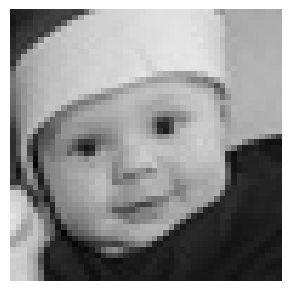

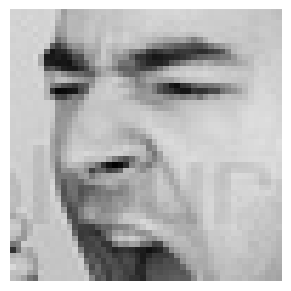

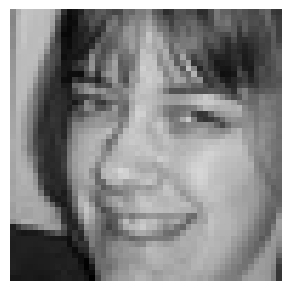

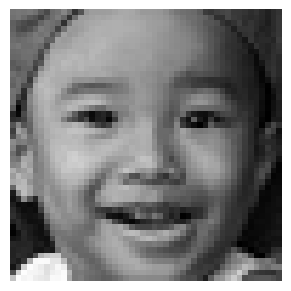

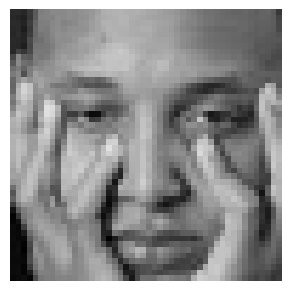

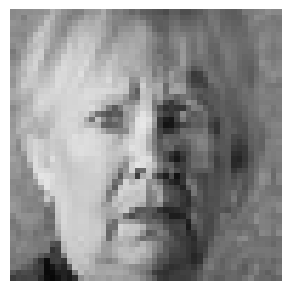

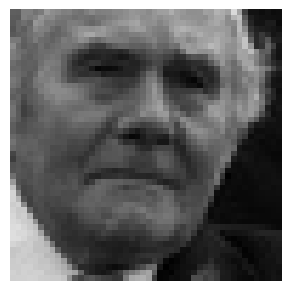

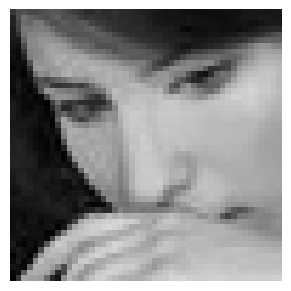

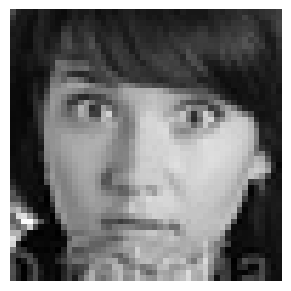

In [4]:
train_images_paths = glob("C:/Users/Anjali/Desktop/Emotion_Recognition/archive (1)/train/**/**")
for i in range(9):
    image = random.choice(train_images_paths)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')

In [41]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("C:/Users/Anjali/Desktop/Emotion_Recognition/archive (1)/train/",
                                                   target_size = (img_size,img_size),
                                                   color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = True)

datagen_validation = ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory("C:/Users/Anjali/Desktop/Emotion_Recognition/archive (1)/test/",
                                                   target_size = (img_size,img_size),
                                                   color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [43]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    
    return x

In [44]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    
    return x

In [45]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs,32,(3,3))
    conv_2 = Convolution(conv_1,64,(5,5))
    conv_3 = Convolution(conv_2,128,(3,3))

    flatten = Flatten()(conv_3)
    
    dense_1 = Dense_f(flatten,256)

    output  = Dense(7, activation="softmax")(dense_1)
    model  =  Model(inputs=[inputs],outputs = [output])
    
    model.compile(loss=['categorical_crossentropy'] , optimizer = 'adam' , metrics =["accuracy"])

    return model

In [46]:
model = model_fer((48,48,1))
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,309,063 (4.99 MB)

 Trainable params: 1,308,103 (4.99 MB)

 Non-trainable params: 960 (3.75 KB)

In [47]:
# Define the cultural context layer
def cultural_context_layer(input_shape):
    def cultural_context(x):
        # Add your cultural context adjustment code here
        # For example, you can use an embedding layer to represent the cultural background
        # and multiply it with the output of the previous layer
        return x
    return Input(shape=input_shape), cultural_context


In [48]:
def create_model(input_shape, num_classes):
    # Define the input layer
    inputs = Input(shape=input_shape)
    
    # Add your CNN architecture layers here
    # Example:
    x = Conv2D(32, (3, 3), activation='relu')(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)  # Output layer for classification
     
    # Create the model
    model = Model(inputs=inputs, outputs=outputs)
    
    return model


    

In [49]:
# Define the input shape and number of classes
input_shape = (48, 48, 3)
num_classes = 7


In [50]:
# Define the cultural context input
cultural_context_input, cultural_context = cultural_context_layer(input_shape)


In [51]:
# Create the CNN model
inputs = Input(shape=input_shape)
model = create_model(input_shape, num_classes)


In [52]:
# Add the cultural context layer to the model
outputs = model(cultural_context_input)
outputs = cultural_context(outputs)


In [53]:
# Compile the model
optimizer = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [54]:
def preprocess_image(image):
    # Add your preprocessing steps here
    # For example, resizing, normalization, etc.
    return cv2.resize(image, (64, 64))  # Resize images to (64, 64)

train_images = [preprocess_image(cv2.imread(image_path)) for image_path in train_images_paths]


In [55]:
input_shape = (48, 48, 1)



In [59]:
gray_image = cv2.imread(r"C:\Users\Anjali\Desktop\Emotion_detection\images.jpg", cv2.IMREAD_GRAYSCALE)
rgb_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2RGB)


In [64]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create the model
model = Sequential()

# Add the first convolutional layer
model.add(Conv2D(1, (3, 3), activation='relu', input_shape=(48, 48, 1)))

# Add the remaining layers
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(7, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(train_generator, steps_per_epoch=1000, epochs=20, validation_data=validation_generator, validation_steps=500, callbacks=callbacks)

Epoch 1/20


C:\Users\Anjali\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 449/1000 ━━━━━━━━━━━━━━━━━━━━ 1:28 161ms/step - accuracy: 0.2727 - loss: 2.0608

C:\Users\Anjali\anaconda3\Anjali1\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 1: saving model to model_weights1.weights.h5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 87s 83ms/step - accuracy: 0.3029 - loss: 1.8803 - val_accuracy: 0.4146 - val_loss: 1.5142
Epoch 2/20
 449/1000 ━━━━━━━━━━━━━━━━━━━━ 1:24 153ms/step - accuracy: 0.4306 - loss: 1.4824
Epoch 2: saving model to model_weights1.weights.h5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 74s 73ms/step - accuracy: 0.4384 - loss: 1.4662 - val_accuracy: 0.4597 - val_loss: 1.4071
Epoch 3/20
 449/1000 ━━━━━━━━━━━━━━━━━━━━ 1:22 150ms/step - accuracy: 0.4900 - loss: 1.3464
Epoch 3: saving model to model_weights1.weights.h5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 73s 73ms/step - accuracy: 0.4917 - loss: 1.3388 - val_accuracy: 0.4880 - val_loss: 1.3284
Epoch 4/20
 448/1000 ━━━━━━━━━━━━━━━━━━━━ 1:19 144ms/step - accuracy: 0.5234 - loss: 1.2573
Epoch 4: saving model to model_weights1.weights.h5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 69s 69ms/step - accuracy: 0.5239 - loss: 1.2566 - val_accuracy: 0.5085 - val_loss: 1.2819
Epoch 5/20
 449/1000 ━━━━━━━━━━━━━━

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Load your dataset here, ensuring it includes images of facial expressions and corresponding labels

# Define your model architecture
def create_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Define data preprocessing functions if needed
def preprocess_data(images, labels):
    # Apply preprocessing steps such as normalization, resizing, etc.
    # Ensure images and labels are formatted appropriately for the model
    return images, labels

# Define model training function
def train_model(model, train_images, train_labels, val_images, val_labels, batch_size=32, epochs=10):
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Preprocess the data
    train_images, train_labels = preprocess_data(train_images, train_labels)
    val_images, val_labels = preprocess_data(val_images, val_labels)
    
    # Train the model
    model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_data=(val_images, val_labels))

# Define model evaluation function
def evaluate_model(model, test_images, test_labels):
    test_images, test_labels = preprocess_data(test_images, test_labels)
    loss, accuracy = model.evaluate(test_images, test_labels)
    print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Define main function
def main():
    # Load your dataset (replace this with your dataset loading code)
    train_images = np.random.rand(100, 64, 64, 3)  # Example random images for demonstration
    train_labels = np.random.randint(0, 7, 100)     # Example random labels (7 classes for facial expressions)

    val_images = np.random.rand(20, 64, 64, 3)      # Example random images for validation
    val_labels = np.random.randint(0, 7, 20)        # Example random labels for validation

    test_images = np.random.rand(20, 64, 64, 3)     # Example random images for testing
    test_labels = np.random.randint(0, 7, 20)       # Example random labels for testing

    # Define model parameters
    input_shape = train_images[0].shape
    num_classes = len(np.unique(train_labels))

    # Create and compile the model
    model = create_model(input_shape, num_classes)

    # Train the model
    train_model(model, train_images, train_labels, val_images, val_labels)

    # Evaluate the model
    evaluate_model(model, test_images, test_labels)

if __name__ == "__main__":
    main()


C:\Users\Anjali\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 274ms/step - accuracy: 0.1386 - loss: 2.0065 - val_accuracy: 0.0000e+00 - val_loss: 2.0221
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - accuracy: 0.1583 - loss: 1.9351 - val_accuracy: 0.0000e+00 - val_loss: 2.1018
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step - accuracy: 0.1979 - loss: 1.9551 - val_accuracy: 0.0000e+00 - val_loss: 2.0963
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - accuracy: 0.1781 - loss: 1.9102 - val_accuracy: 0.0000e+00 - val_loss: 1.9826
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step - accuracy: 0.1781 - loss: 1.9343 - val_accuracy: 0.0000e+00 - val_loss: 1.9626
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step - accuracy: 0.2145 - loss: 1.9168 - val_accuracy: 0.0000e+00 - val_loss: 1.9695
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - accuracy: 0.1864 - loss: 1.9039 - val_accuracy: 0.0000e+00 - val_loss: 2.0456
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 0.2041 - loss: 1.9229 - val_